In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style, rc
from sklearn.cluster import KMeans

### Parámetros

In [2]:
N = 1000
plt.rcParams["figure.figsize"] = (15, 15)
plt.rcParams["figure.figsize"] = (15, 15)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}


rc('font', **font)

style.use("ggplot")
# dir(plt.rcParams.keys())


### Aplicar K-means sobre N = 1000 puntos en la 2-bola.
K = 1, 2, 3, 4, 5, 10.

In [3]:
proportion = (np.pi *(1) / (2*2)) # para mantener los puntos en un radio de 1 y excluir un 30%, 
#eso hará que coincida con el número de obs aprox.

In [4]:
X1, X2 = np.random.random(int(N /proportion)) * 2 - 1, np.random.random(int(N /proportion)) * 2 - 1

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


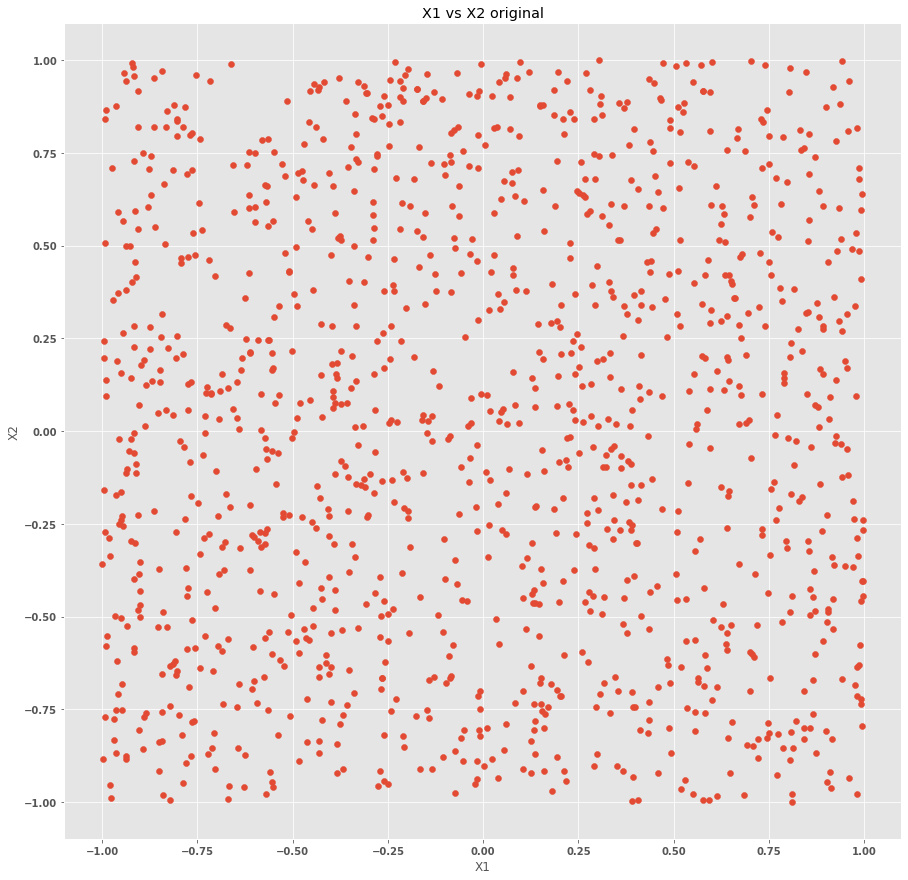

In [5]:
title = "X1 vs X2 original"
xlabel = "X1"
ylabel = "X2"

plt.figure()
plt.scatter(X1, X2)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel);



In [6]:
distancia = ((X1)**2 + (X2)**2)**(1/2)

In [7]:
X = np.concatenate([X1[distancia <= 1], X2[distancia <= 1]]).reshape(2,-1).T
X.shape

(1002, 2)

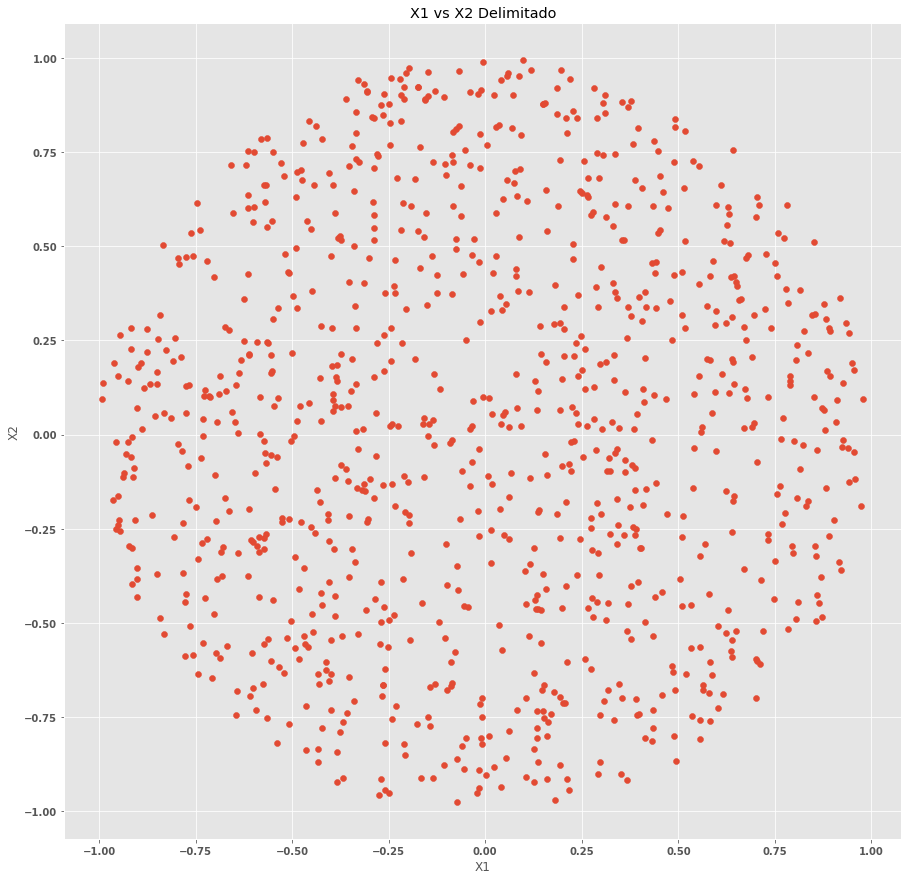

In [8]:
title = "X1 vs X2 Delimitado"
xlabel = "X1"
ylabel = "X2"

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel);



### 1. Graficar la clase para cada punto

1


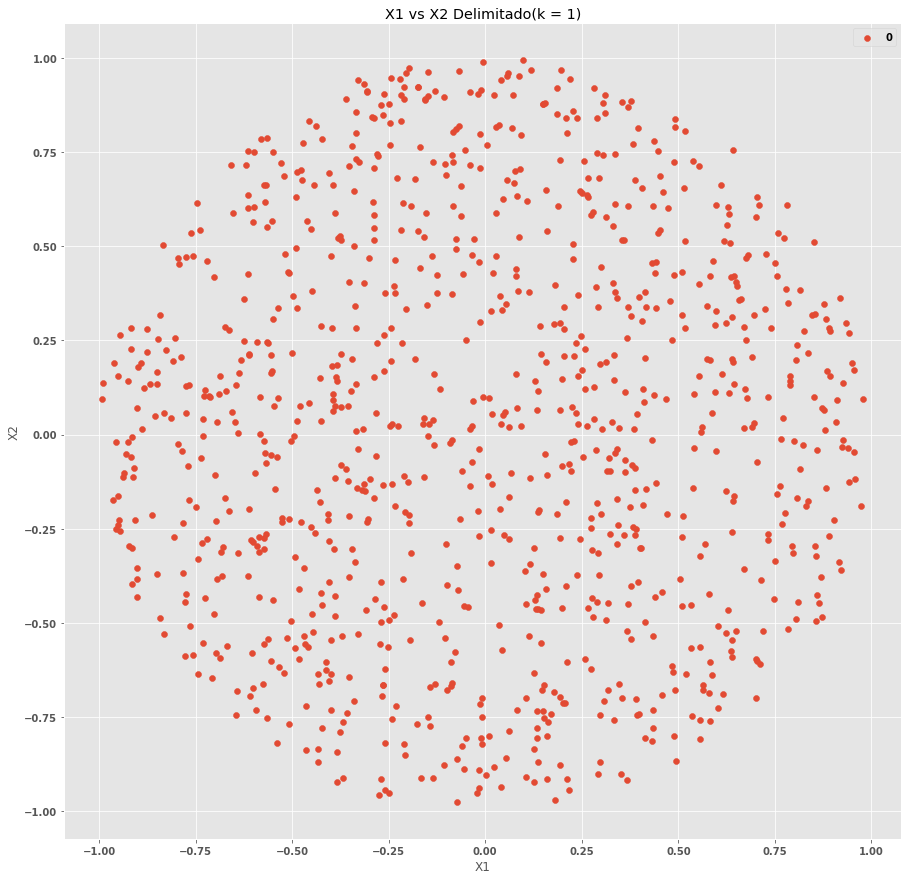

2


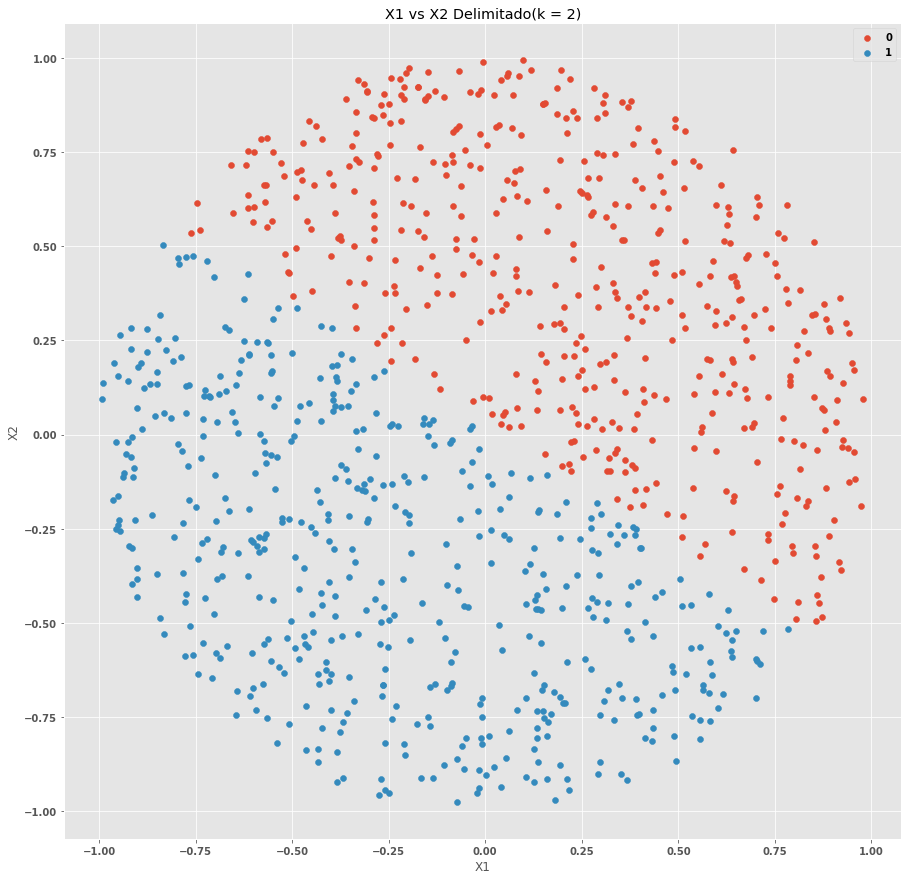

3


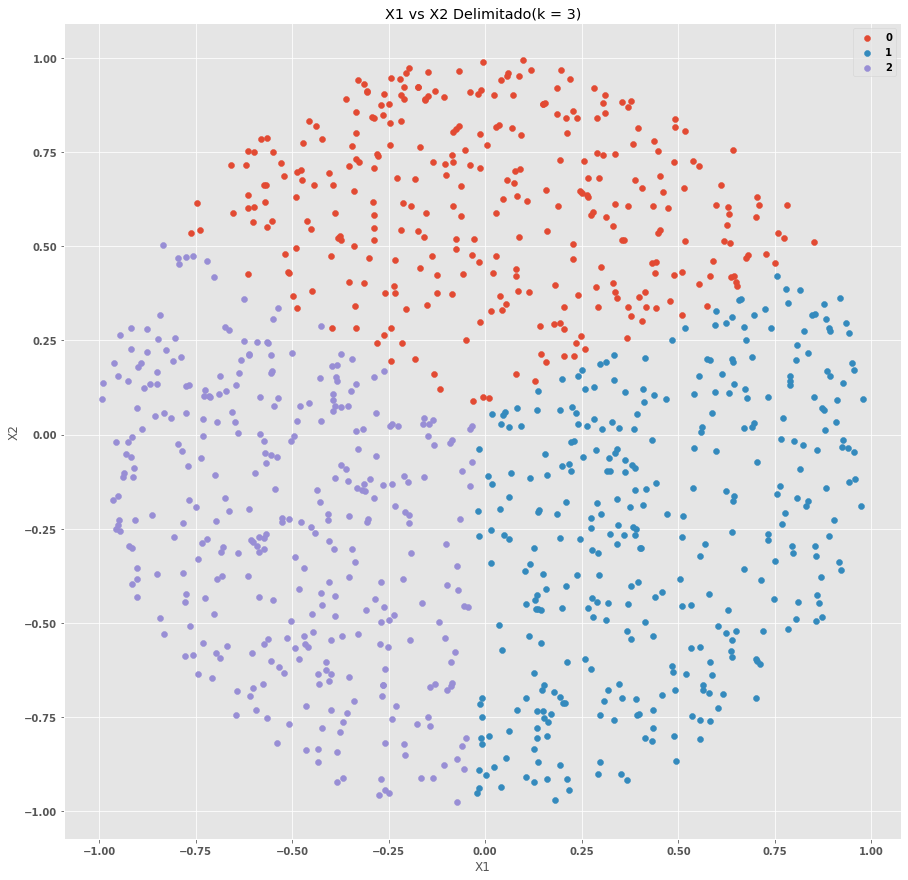

4


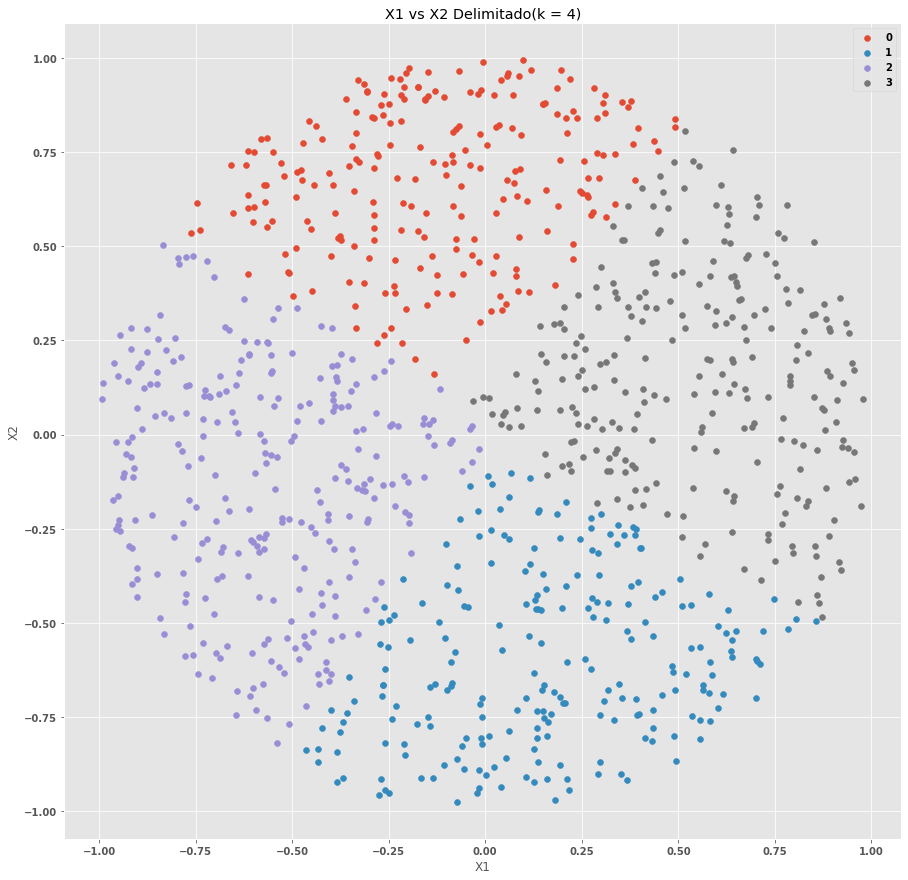

5


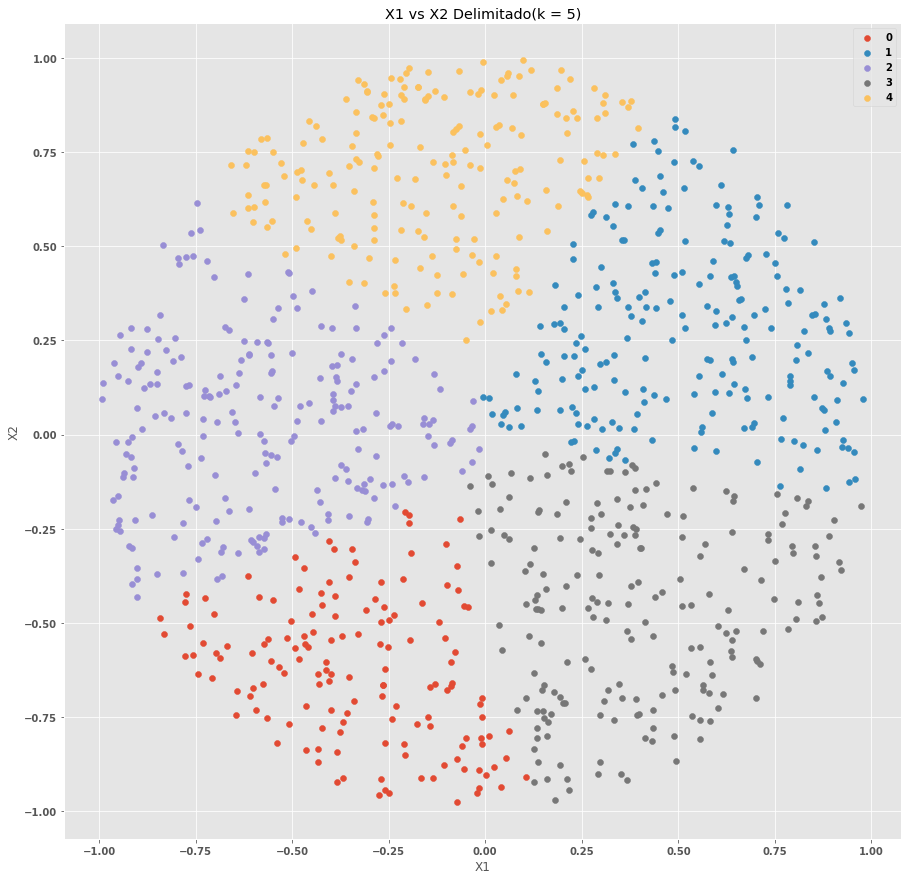

10


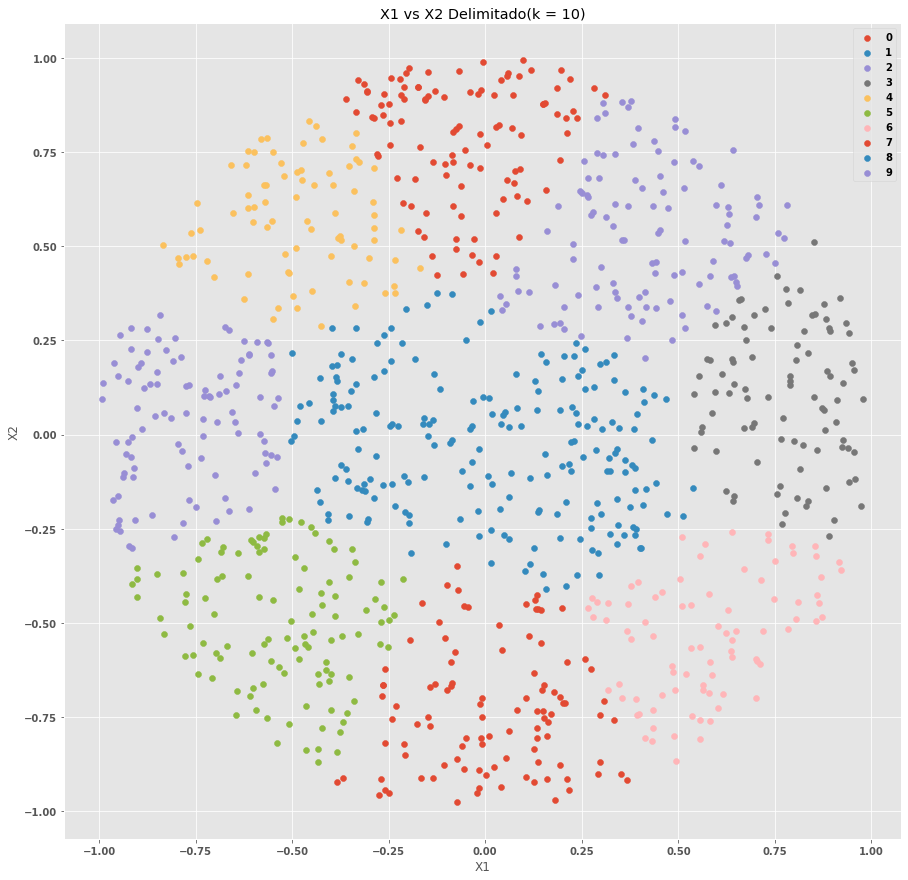

In [30]:
clusters = []
ks = [1, 2, 3, 4, 5, 10]
densities= []
distances = []
for k in ks:
    kmeans = KMeans(n_clusters = k)
    cluster = kmeans.fit_predict(X)
    clusters.append(cluster)
    densities.append((k,[(i, sum(cluster == i)) for i in np.unique(cluster)]))
    distances.append(kmeans.transform(X).min(axis = 1))
    title = f"X1 vs X2 Delimitado(k = {k})"
    xlabel = "X1"
    ylabel = "X2"

    print(k)
    plt.figure()
    for k_ in np.unique(cluster):
        plt.scatter(X[k_ == cluster, 0], X[k_ == cluster, 1], label = f"{k_}")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show();

### 2. ¿De qué tamanho son los k grupos?

In [51]:
densities

[(1, [(0, 1002)]),
 (2, [(0, 492), (1, 510)]),
 (3, [(0, 316), (1, 345), (2, 341)]),
 (4, [(0, 229), (1, 229), (2, 283), (3, 261)]),
 (5, [(0, 149), (1, 220), (2, 228), (3, 205), (4, 200)]),
 (10,
  [(0, 107),
   (1, 111),
   (2, 100),
   (3, 92),
   (4, 81),
   (5, 114),
   (6, 85),
   (7, 103),
   (8, 95),
   (9, 114)])]

### 3. ¿Cuál es la distancia de cada vector a su centroide?

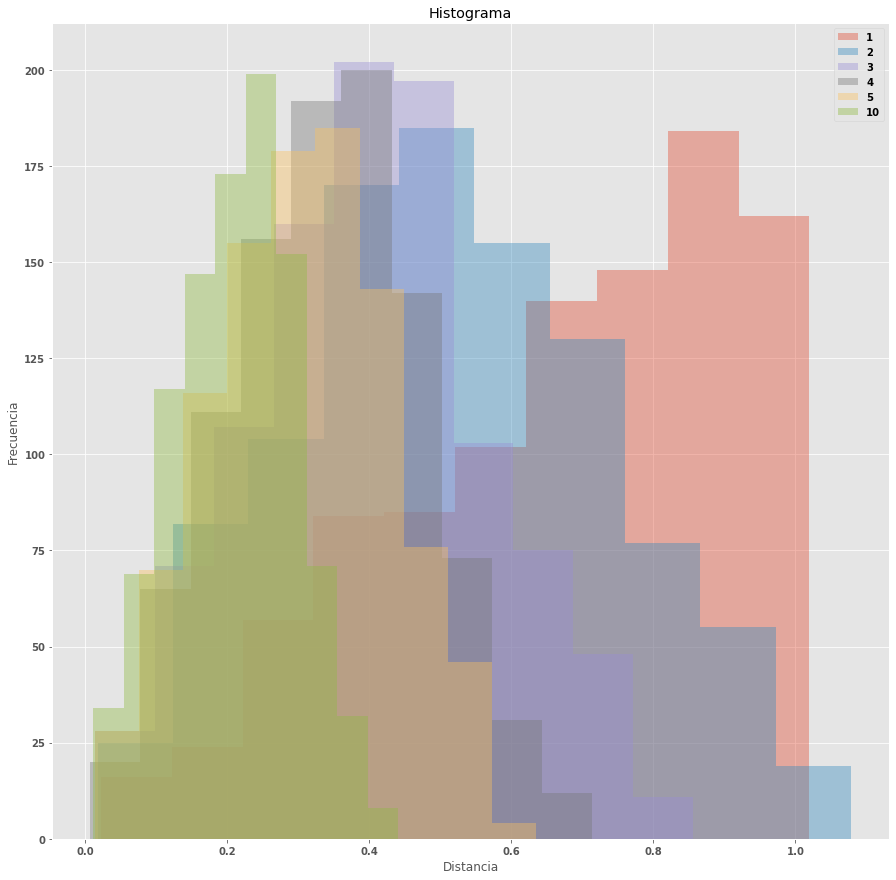

In [48]:
for i, distance in enumerate(distances):
    plt.hist(distance, label = ks[i], alpha = .4)
plt.legend()
title = "Histograma"
xlabel = "Distancia"
ylabel = "Frecuencia"

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel);

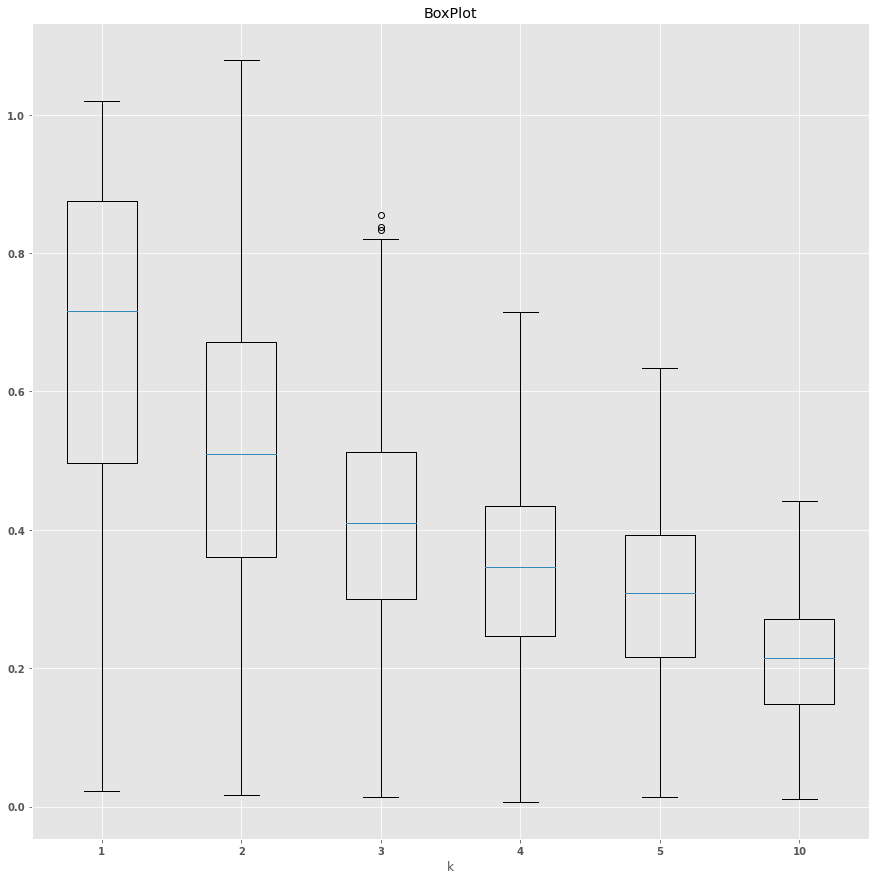

In [49]:
temp = []
for i, distance in enumerate(distances):
    temp.append(distance)
plt.boxplot(temp);
locs, labels = plt.xticks()
plt.xticks( locs, ks)
title = "BoxPlot"
xlabel = "k"
ylabel = ""

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel);

### 4. ¿Puedme computarse k-means con distancia diferente a la Euclideana?
Sí, sólo cambiaría el método de optimización
https://en.wikipedia.org/wiki/K-medoids